In [70]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Load the sales dataset
data=pd.read_csv(r"/Users/namratamuralidharan/Downloads/e-commerce/sales_dataset.csv")

Data Verification 

In [72]:
# Inspect the data
data.head()

,Order ID,Product ID,Product Category,Quantity,Unit Price,Total Price,Order Date,Customer ID,Payment Type,Order Status
0,873ff350-854d-4bd8-aebf-6cc5e1a6d3b7,26ab320e-62f2-4203-be68-f8740085d796,Sports & Outdoors,4,154.050509,616.202036,2023-08-02,292fe8cf-4d60-437b-8488-4c225e84d48d,Credit Card,Completed
1,7cb2641e-ea6b-4faf-a7ab-24992d5573fa,8c0d7ba9-1e6b-412a-8359-97d964ad19e5,Home & Kitchen,5,275.539908,1377.699538,2023-09-03,a026178d-e3ed-4d45-a49c-8336479b2114,PayPal,Refunded
2,94e0de8a-419d-46e1-9e7c-65c730b89c65,5d65b6c7-1894-4207-b7e3-b53cc2d5e5e3,Beauty & Health,3,56.410098,169.230294,2023-12-06,808e8010-1552-42dd-a9c5-eacd4fde3283,Debit Card,Cancelled
3,88cc8ccf-f018-46ac-ba3b-f36b5cf4e429,b3f6c6a5-d3cb-49a4-b53b-3996be815c28,Books,2,176.410906,352.821812,2023-07-22,6184896b-4fb2-4ae0-9851-65033dae1319,PayPal,Pending
4,eb520575-720e-456e-9dc5-c2c3bb887bfc,fed52dbf-49c6-4128-8b18-c36e50184a04,Electronics,3,409.892144,1229.676431,2023-04-08,24689017-68fc-42ba-8ae6-f0ad7155e0d6,Credit Card,Cancelled


In [73]:
# Verify the data types
data.dtypes

Order ID             object
Product ID           object
Product Category     object
Quantity              int64
Unit Price          float64
Total Price         float64
Order Date           object
Customer ID          object
Payment Type         object
Order Status         object
dtype: object

Check the string/object columns to verify there are no duplicates:

In [74]:
# Inspect the unique payment types in the dataset
data.groupby('Payment Type')['Payment Type'].value_counts()

Payment Type
Credit Card    2453
Debit Card     2529
Gift Card      2445
PayPal         2573
Name: count, dtype: int64

In [59]:
# Inspect the various product categories
data.groupby('Product Category')['Product Category'].value_counts()

Product Category
Beauty & Health      1614
Books                1634
Clothing             1704
Electronics          1665
Home & Kitchen       1664
Sports & Outdoors    1719
Name: count, dtype: int64

In [60]:
# Inspect the various order statuses
data.groupby('Order Status')['Order Status'].value_counts()

Order Status
Cancelled    2537
Completed    2457
Pending      2575
Refunded     2431
Name: count, dtype: int64

Data Cleaning:

In [61]:
# Round the unit price and total price column to 2 decimal points
data['Unit Price'] = data['Unit Price'].round(2)
data['Total Price'] = data['Total Price'].round(2)

In [62]:
# Check the data to see if the change is implemented
data.head()

,Order ID,Product ID,Product Category,Quantity,Unit Price,Total Price,Order Date,Customer ID,Payment Type,Order Status
0,873ff350-854d-4bd8-aebf-6cc5e1a6d3b7,26ab320e-62f2-4203-be68-f8740085d796,Sports & Outdoors,4,154.05,616.20,2023-08-02,292fe8cf-4d60-437b-8488-4c225e84d48d,Credit Card,Completed
1,7cb2641e-ea6b-4faf-a7ab-24992d5573fa,8c0d7ba9-1e6b-412a-8359-97d964ad19e5,Home & Kitchen,5,275.54,1377.70,2023-09-03,a026178d-e3ed-4d45-a49c-8336479b2114,PayPal,Refunded
2,94e0de8a-419d-46e1-9e7c-65c730b89c65,5d65b6c7-1894-4207-b7e3-b53cc2d5e5e3,Beauty & Health,3,56.41,169.23,2023-12-06,808e8010-1552-42dd-a9c5-eacd4fde3283,Debit Card,Cancelled
3,88cc8ccf-f018-46ac-ba3b-f36b5cf4e429,b3f6c6a5-d3cb-49a4-b53b-3996be815c28,Books,2,176.41,352.82,2023-07-22,6184896b-4fb2-4ae0-9851-65033dae1319,PayPal,Pending
4,eb520575-720e-456e-9dc5-c2c3bb887bfc,fed52dbf-49c6-4128-8b18-c36e50184a04,Electronics,3,409.89,1229.68,2023-04-08,24689017-68fc-42ba-8ae6-f0ad7155e0d6,Credit Card,Cancelled


Data is clean and ready for analysis.

1. Sales Analysis:  


1.1 What is the total revenue per month/year?  


In [63]:
# Check the first and last dates in the dataset
start_date = data['Order Date'].min()
end_date = data['Order Date'].max()
start_date, end_date

('2023-01-01', '2023-12-31')

Since it only has one year of data, we can only analyse the total revenue per month.

In [64]:
# Convert 'Order Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])
# Extract month from 'Order Date'
data['Month'] = data['Order Date'].dt.month
# Group by year and month, then sum the 'Total Price' for each group
monthly_revenue = data.groupby('Month')['Total Price'].sum().reset_index()
# Sort the results for better readability (optional)
monthly_revenue = monthly_revenue.sort_values(by= 'Month')
# Display the monthly revenue
monthly_revenue

,Month,Total Price
0,1,681775.77
1,2,590371.65
2,3,658498.06
3,4,593018.81
4,5,646232.99
5,6,612353.05
6,7,667303.26
7,8,637847.18
8,9,608391.03
9,10,670279.01


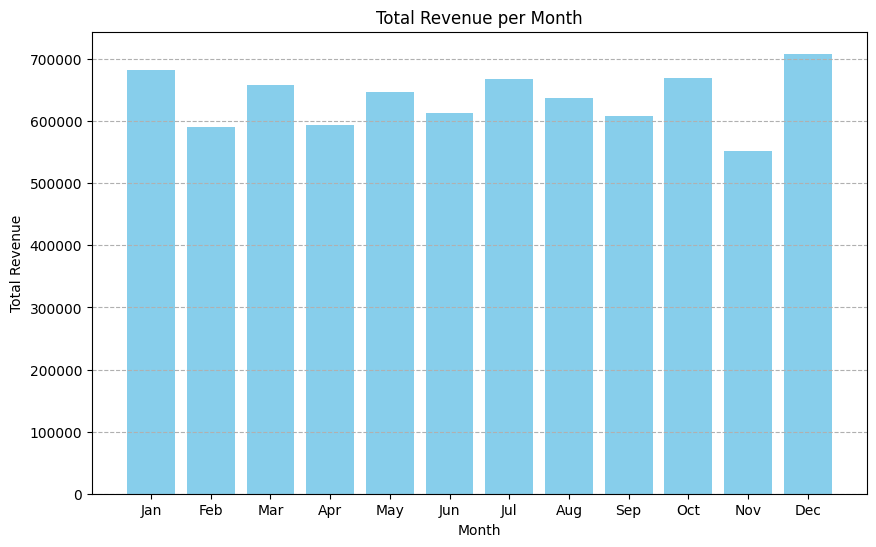

In [65]:
# Visualise the Total Revenu Per Month
plt.figure(figsize=(10, 6))
plt.bar(monthly_revenue['Month'], monthly_revenue['Total Price'], color='skyblue')
plt.title('Total Revenue per Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(monthly_revenue['Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--')
# Show plot
plt.show()

1.2 How do sales vary across different product categories?  

In [66]:
# Group data by Product category and calculate total revenue
data.groupby('Product Category')['Total Price'].sum().sort_values(ascending=False)

Product Category
Sports & Outdoors    1313735.59
Clothing             1303679.26
Electronics          1290283.15
Home & Kitchen       1268471.92
Books                1249307.08
Beauty & Health      1201764.89
Name: Total Price, dtype: float64

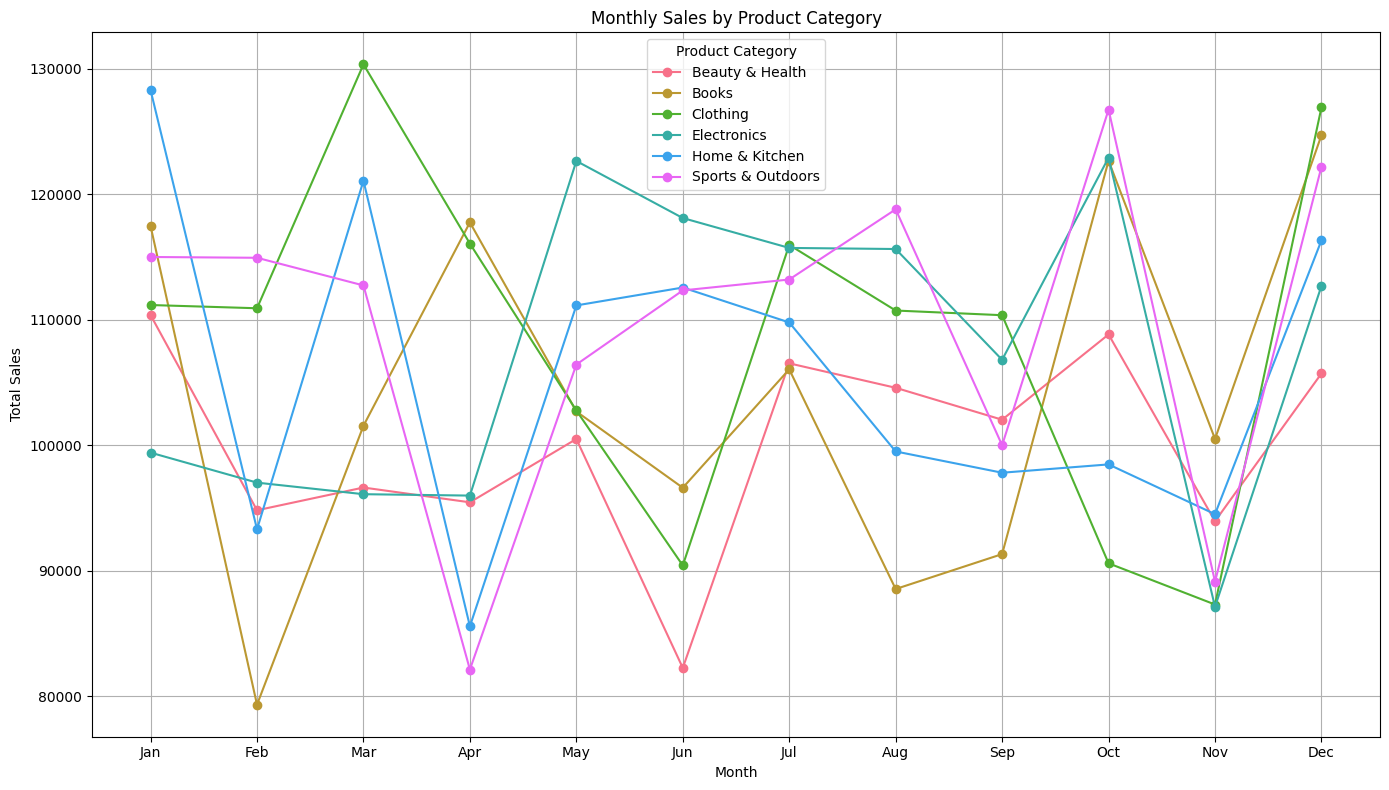

In [67]:
# Visualise the revenue generate per category per month
# Group by 'Month' and 'Product Category', then sum the 'Total Price'
monthly_category_sales = data.groupby(['Month', 'Product Category'])['Total Price'].sum().reset_index()
# Pivot the data for visualization
pivot_table = monthly_category_sales.pivot(index='Month', columns='Product Category', values='Total Price').fillna(0)
# Load an existing distinct color palette
palette = sns.color_palette("husl", len(pivot_table.columns))
# Plotting with the seaborn color palette
plt.figure(figsize=(14, 8))
for idx, category in enumerate(pivot_table.columns):
    plt.plot(pivot_table.index, pivot_table[category], marker='o', label=category, color=palette[idx])
plt.title('Monthly Sales by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Product Category')
plt.grid(True)
plt.tight_layout()
# Show plot
plt.show()

All categories experienced a dip in sales in November and went up again in December.  
One reason for the spike in sales in December could be due to Christmas shopping.

Sport & Outdoors generates the most revenue, and Beauty & Health generates the least revenue.
But is the revenue greater because Sports & Outdoors category has the most sales or does it just have expensive products?  
To check this, we need to look at quantity of items sold as well.

In [68]:
# Group data by Product Category to calculate the total products sold and revenue per Product Category
data.groupby('Product Category').agg(Quantity=('Quantity', 'count'), Total_Sales=('Total Price', 'sum')).sort_values(by='Quantity', ascending=False)

,Quantity,Total_Sales
Product Category,,
Sports & Outdoors,1719,1313735.59
Clothing,1704,1303679.26
Electronics,1665,1290283.15
Home & Kitchen,1664,1268471.92
Books,1634,1249307.08
Beauty & Health,1614,1201764.89


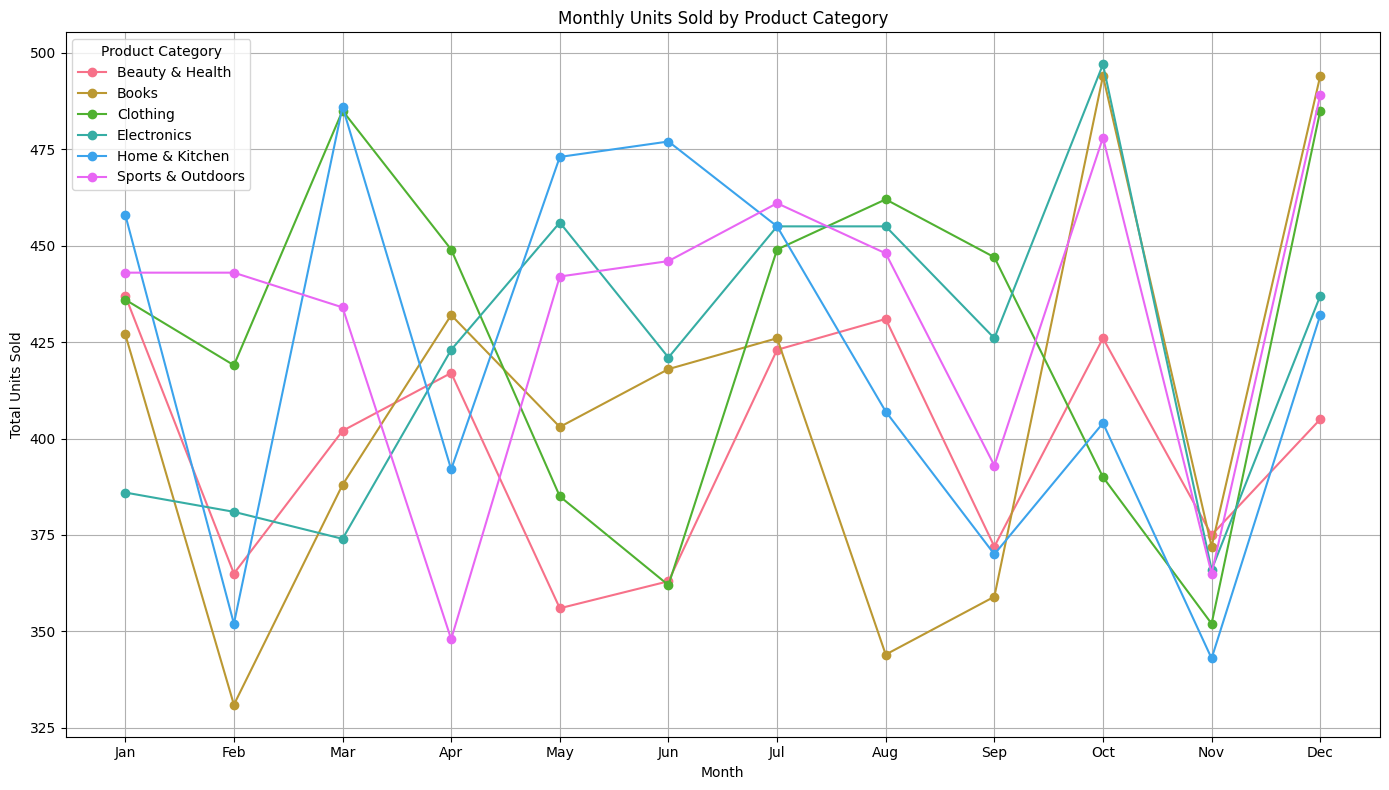

In [69]:
# Group by 'Month' and 'Product Category', then sum the 'Quantity'
monthly_category_units = data.groupby(['Month', 'Product Category'])['Quantity'].sum().reset_index()
# Pivot the data for visualization
pivot_table_units = monthly_category_units.pivot(index='Month', columns='Product Category', values='Quantity').fillna(0)
# Load an existing distinct color palette
palette = sns.color_palette("husl", len(pivot_table_units.columns))
# Plotting with the seaborn color palette for units sold
plt.figure(figsize=(14, 8))
for idx, category in enumerate(pivot_table_units.columns):
    plt.plot(pivot_table_units.index, pivot_table_units[category], marker='o', label=category, color=palette[idx])
plt.title('Monthly Units Sold by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Product Category')
plt.grid(True)
plt.tight_layout()
# Show plot
plt.show()

Sport & Outdoors is the best-selling category and Beauty & Health is the least popular category, and they are consitent in terms of products sold and revenue generated.

1.3 Is there a relationship between unit price and quantity sold?

In [79]:
# Group product catergories by number of products sold and unit price
data.groupby('Product Category').agg(Quantity=('Quantity', 'count'), UnitPrice=('Unit Price', 'sum')).sort_values(by='Quantity', ascending=False)

,Quantity,UnitPrice
Product Category,,
Sports & Outdoors,1719,431149.084919
Clothing,1704,433358.072303
Electronics,1665,424753.386614
Home & Kitchen,1664,421195.104984
Books,1634,416553.851955
Beauty & Health,1614,405771.282146


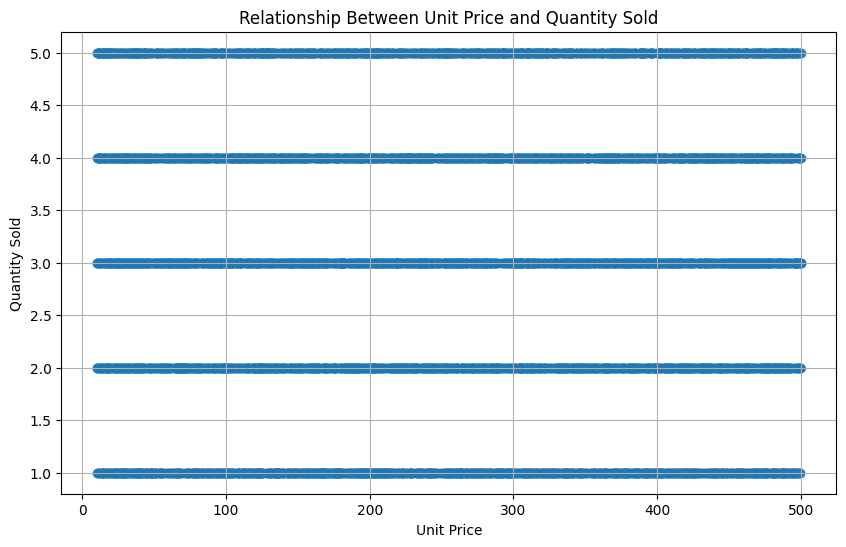

In [80]:
# Visualise the relationship between unit price and quantity sold
plt.figure(figsize=(10, 6))
plt.scatter(data['Unit Price'], data['Quantity'], alpha=0.5)
plt.title('Relationship Between Unit Price and Quantity Sold')
plt.xlabel('Unit Price')
plt.ylabel('Quantity Sold')
plt.grid(True)
# Show plot
plt.show()

2. Customer Analysis:

2.1 How many unique customers are there?


In [16]:
# Number of unique customers
data['Customer ID'].nunique()

10000

Since the total number of customers are equal to the total number of rows in the dataset, there are no repeat customers.

2.2 What is the average purchase value per customer?

In [ ]:
# Calculate the total purchase value per customer
total_purchase_per_customer = data.groupby('Customer ID')['Total Price'].sum()
# Calculate the average purchase value per customer
average_purchase_value_per_customer = total_purchase_per_customer.mean()
average_purchase_value_per_customer.round(2)

762.72

3. Order Analysis:


3.1 What is the distribution of order statuses (Completed, Refunded, Cancelled, Pending)?


In [32]:
data.groupby('Order Status')['Order Status'].value_counts()

Order Status
Cancelled    2537
Completed    2457
Pending      2575
Refunded     2431
Name: count, dtype: int64

3.2 How does the payment type affect order completion rates?


In [17]:
data.groupby(['Payment Type','Order Status'])['Order Status'].value_counts()

Payment Type  Order Status
Credit Card   Cancelled       608
              Completed       605
              Pending         680
              Refunded        560
Debit Card    Cancelled       642
              Completed       610
              Pending         626
              Refunded        651
Gift Card     Cancelled       651
              Completed       598
              Pending         607
              Refunded        589
PayPal        Cancelled       636
              Completed       644
              Pending         662
              Refunded        631
Name: count, dtype: int64

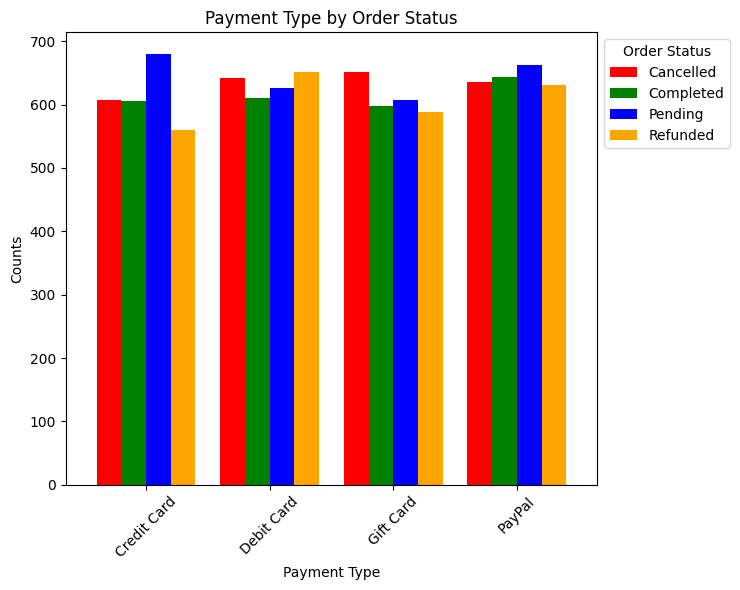

In [18]:
# Prepare the data for visualization based on the updated grouping
payment_status_counts = data.groupby(['Payment Type', 'Order Status']).size().unstack(fill_value=0)
# Custom colors for each order status
colors = {'Cancelled': 'red', 'Completed': 'green', 'Refunded': 'orange', 'Pending': 'blue'}
# Plotting a clustered bar chart with custom colors
# Plotting a clustered bar chart with custom colors and adjusted legend position
payment_status_counts.plot(kind='bar', figsize=(10, 6), width=0.8,
                           color=[colors[status] for status in payment_status_counts.columns])
plt.title('Payment Type by Order Status')
plt.xlabel('Payment Type')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Order Status', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.75, 1])  # Adjust the right side of the plot to make space for the legend
plt.show()

3.3 What is the average order value, and how does it vary across product categories?

In [34]:
# Calculate the average order value across all orders
average_order_value = data['Total Price'].mean().round(2)
# Calculate the average order value per product category
average_order_value_by_category = data.groupby('Product Category')['Total Price'].mean()
# Display the overall average order value, rounded to 2 decimal places
overall_average_order_value = round(average_order_value, 2)
# Display the average order value by category, rounded to 2 decimal places
average_order_value_by_category_rounded = average_order_value_by_category.round(2)
average_order_value, average_order_value_by_category_rounded.sort_values(ascending=False)

(762.72,
 Product Category
 Electronics          774.94
 Clothing             765.07
 Books                764.57
 Sports & Outdoors    764.24
 Home & Kitchen       762.30
 Beauty & Health      744.59
 Name: Total Price, dtype: float64)